In [1]:
# Alg de kmeans
# initialiser les moyennes (centroides) des clusters (groupes)
# Pour t=0 -> Tmax:
#    1. determiner les clusters à partir des moyennes
#    2. mise-a-jour des moyennes
#    [3. verfication de la convergence]

In [2]:
# initialiser les moyennes (centroides) des clusters (groupes)
import numpy as np
X=np.array([[1,4],[2,4],[2,3],[3,3],[10,10],[12,10],[12,9],[11,11]])
# nombre de clusters
K=2 
# dimension de matrice des donnees
N,dim=X.shape
indices=np.arange(0,N,1)
K_indices=np.random.choice(indices,K)
X[K_indices,:]

array([[12, 10],
       [11, 11]])

In [3]:
def initialiser_moyennes(X,K):
    N,dim=X.shape
    indices=np.arange(0,N,1)
    K_indices=np.random.choice(indices,K)
    M=X[K_indices,:]
    return M

In [4]:
X=np.array([[1,4],[2,4],[2,3],[3,3],[10,10],[12,10],[12,9],[11,11]])
# nombre de clusters
K=2
M=initialiser_moyennes(X,K)
M

array([[11, 11],
       [ 2,  3]])

In [5]:
import matplotlib.pyplot as plt
plt.plot(X[:,0],X[:,1],'r+')
plt.plot(M[:,0],M[:,1],'b*',markersize=10)
plt.show()

<Figure size 640x480 with 1 Axes>

In [6]:
def calcul(x,y):
    return x+y,x*y

In [7]:
s,p=calcul(10,20)
print(s,p)

30 200


In [8]:
# recuperer les lignes d'indices 0 et 2
Y=X[[0,2],:]
Y[[True,False],:]

array([[1, 4]])

In [9]:
x=np.array([10,3,8])
np.argmin(x)

1

In [10]:
K,dim=M.shape
K

2

In [11]:
def distance_euc(x1,x2):
    dist=np.sqrt(np.dot(x1-x2,x1-x2))
    return dist
x1=np.array([1,1])
x2=np.array([1,2])
distance_euc(x1,x2)

1.0

In [12]:
#1. determiner les clusters à partir des moyennes

# fonction predict_clutser(x_n) returns cluster label
#     D = vecteur de distances de taille K (D=np.zeros(N))
#     Pour chaque moyenne m_i ( centre ) (ligne) de M (i=0,..,K-1)
#           D[i]=distance(x_n,m_i)
#     l_n=argmin(D) (l_n in {0,..,K-1})
#     return l_n

# fonction determiner_clusters(X) returns L
#    L=vecteur des etiquettes des clusters (ln in {0,...,K-1})
#    Pour chaque point x_n (ligne) de X (n=0,...,N-1)
#       L[n]=predict_clutser(x_n)
#    return L



def predict_clutser(x_n,M): #returns cluster label
    # D = vecteur de distances de taille K (D=np.zeros(N))
    K,dim=M.shape
    D=np.zeros(K)
    # Pour chaque moyenne m_i ( centre ) (ligne) de M (i=0,..,K-1)
    for i in np.arange(0,K,1):
        # D[i]=distance(x_n,m_i)
        D[i]=distance_euc(x_n,M[i,:])
    l_n=np.argmin(D) #(l_n in {0,..,K-1})
    return l_n

In [13]:
K=2
M=X[[0,5],:]
predict_clutser(X[4,:],M)

1

In [14]:
def determiner_clusters(X,M): # returns L
    #L=vecteur des etiquettes des clusters (ln in {0,...,K-1})
    N,dim=X.shape
    L=np.zeros(N)
    # Pour chaque point x_n (ligne) de X (n=0,...,N-1)
    for n in np.arange(0,N,1):
        L[n]=predict_clutser(X[n,:],M)
    return L

In [15]:
K=2
M=X[[0,5],:]
L=determiner_clusters(X,M)
L==1

array([False, False, False, False,  True,  True,  True,  True])

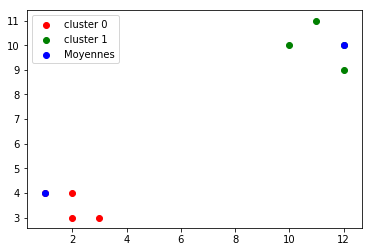

In [16]:
import matplotlib.pyplot as plt
plt.scatter(X[L==0,0],X[L==0,1],c='red',label='cluster 0')
plt.scatter(X[L==1,0],X[L==1,1],c='green',label='cluster 1')
plt.scatter(M[:,0],M[:,1],c='blue',label='Moyennes')
plt.legend()
plt.show()

In [17]:
#2. mise-a-jour des moyennes
def mettre_ajour_moyennes(X,L,K): # returns M
    N,dim=X.shape
    M=np.zeros((K,dim))
    for i in np.arange(0,K,1):
        M[i,:]=np.mean(X[L==i,:],axis=0)
    return M

In [18]:
K=2
M=mettre_ajour_moyennes(X,L,K)
M

array([[ 2.  ,  3.5 ],
       [11.25, 10.  ]])

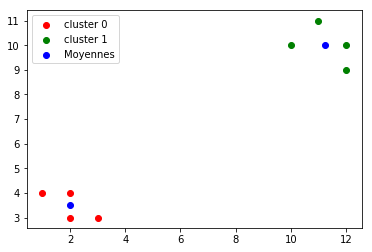

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X[L==0,0],X[L==0,1],c='red',label='cluster 0')
plt.scatter(X[L==1,0],X[L==1,1],c='green',label='cluster 1')
plt.scatter(M[:,0],M[:,1],c='blue',label='Moyennes')
plt.legend()
plt.show()

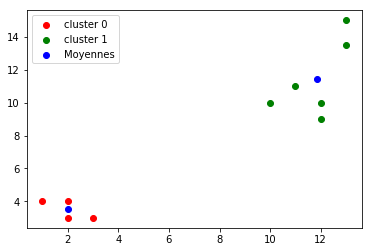

In [20]:
# Alg de kmeans
# initialiser les moyennes (centroides) des clusters (groupes)
# Pour t=0 -> Tmax:
#    1. determiner les clusters à partir des moyennes
#    2. mise-a-jour des moyennes
#    [3. verfication de la convergence]

X=np.array([[1,4],[2,4],[2,3],[3,3],[10,10],[12,10],[12,9],[11,11],[13,13.5],[13,15]])
# nombre de clusters
K=2
Tmax=5
M=initialiser_moyennes(X,K)
for t in np.arange(0,Tmax,1):
    L=determiner_clusters(X,M)
    M=mettre_ajour_moyennes(X,L,K)


import matplotlib.pyplot as plt
plt.scatter(X[L==0,0],X[L==0,1],c='red',label='cluster 0')
plt.scatter(X[L==1,0],X[L==1,1],c='green',label='cluster 1')
plt.scatter(M[:,0],M[:,1],c='blue',label='Moyennes')
plt.legend()
plt.show()

In [21]:
X_test=np.array([[0,5],[18,17]])
determiner_clusters(X_test,M)

array([0., 1.])

In [22]:
L

array([0., 0., 0., 0., 1., 1., 1., 1., 1., 1.])